# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif,f_classif
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,learning_curve,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mlxtend.evaluate import bias_variance_decomp
from sklearn import tree, metrics, model_selection, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
import pydotplus
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

from matplotlib import pyplot

# PipeLine to load the dataset

In [2]:
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    df =pd.read_csv(filename, index_col=0)
    return df

# PipeLine for data cleaning

In [3]:
#Pre-processing, cleaning the data
def preprocess_df(df):

    df = df.drop_duplicates()
    df.reset_index(drop=True, inplace=True)
    
    # Standardizing the Reviews column as there is huge difference between min and max value
    df["Reviews"] = np.log(df["Reviews"] +1 )
    
    # Handling none values in target variable - Job type

    df['Job type'] = df['Job type'].replace("none",'NA')
    df['Job type'].fillna(0)
    #print('df["Job type"] with NA ',df['Job type'])

    # Encoding categorical data (target variable "job type")

    l1 = LabelEncoder()
    l1.fit(df['Job type'])
    df['Job type'] = l1.transform(df['Job type'])
    
    # Separating dependent and independent variables
    features = ['Jobtitle','Companies','Locations','Experience','Skills','Salary','Reviews','Age of post','Logo','Rating','Job Description']
    X = df.loc[:,features].values # independent
    y = df.loc[:,'Job type'].values # dependent
    
    # format all fields as string
    X = X.astype(str)
    return X,y,df

# PipeLine for FeatureSelection

In [4]:
# Feature selection using ANOVA for numeric input and categorical output
def feature_selection(X,y,df):
    
    oe = OrdinalEncoder()
    oe.fit(X)
    X_enc = oe.transform(X)

    # define feature selection
    fs = SelectKBest(score_func=f_classif, k=6)
    
    # apply feature selection
    X_selected = fs.fit_transform(X_enc, y)

    # what are scores for the features
    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
    
    # plot the scores
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    pyplot.show()
    
    l1 = LabelEncoder()
    l1.fit(df['Job type'])
    df['Job type'] = l1.transform(df['Job type'])
    y = df.loc[:,'Job type'].values # so that target variable 'y' is assgined numeric values 
    
    return X_selected, y,df

# PipeLine for GridSearch

In [5]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

# Calling Pipelines along with tuning parameters for all algorithms

In [6]:
# load the dataset
df = load_dataset('C:/Users/sonia/OneDrive/Desktop/Sonia/MDX/CST4050_LR/CW_Related/CW2/CW2-Summative_Cw_ML_Pipeline/M00795134-SoniaValeja-CW2-ML-PipeLine/Preprocessed.csv')

In [7]:
#Pre-processing, cleaning the data
X,y,df=preprocess_df(df)


<ipython-input-3-3417fc9d9529>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Reviews"] = np.log(df["Reviews"] +1 )
<ipython-input-3-3417fc9d9529>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job type'] = df['Job type'].replace("none",'NA')
<ipython-input-3-3417fc9d9529>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

Feature 0: 4.459209
Feature 1: 51.879587
Feature 2: 3.685637
Feature 3: 87.724032
Feature 4: 2.382352
Feature 5: 27.943439
Feature 6: 859.336512
Feature 7: 95.263197
Feature 8: 423.479778
Feature 9: 183.587371
Feature 10: 5.026961


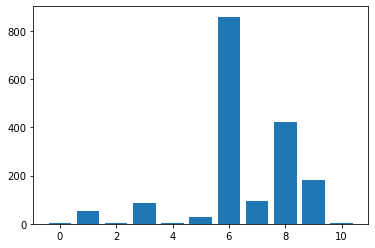

In [8]:
#Feature selection using ANOVA
X, y,df=feature_selection(X,y,df)


# Splitting into train and test sets

In [9]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Logistic Regression Steps

In [10]:
skfold = StratifiedKFold(n_splits=5)
model = LogisticRegression(solver= 'liblinear')
result = cross_val_score(model, X, y, cv = skfold)
print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

# fit the model
model.fit(X_train, y_train)

K-Fold (R^2) Scores: [0.53098189 0.51622137 0.55629771 0.55725191 0.57538168]
Mean R^2 for Cross-Validation K-Fold: 0.5472269118535282


LogisticRegression(solver='liblinear')

In [11]:
# evaluate the model
yhat = model.predict(X_test)

In [12]:
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 55.00


In [13]:
# Precision, Recall, F1 Score and Support
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.59      0.87      0.70       485
           1       0.40      0.08      0.13       173
           2       0.49      0.76      0.60       100
           3       0.46      0.22      0.29       291

    accuracy                           0.55      1049
   macro avg       0.48      0.48      0.43      1049
weighted avg       0.51      0.55      0.49      1049



In [14]:
# Bias, Variance and Mean Squared Error
from mlxtend.evaluate import bias_variance_decomp
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=20, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 2.375
Bias: 2.208
Variance: 0.167


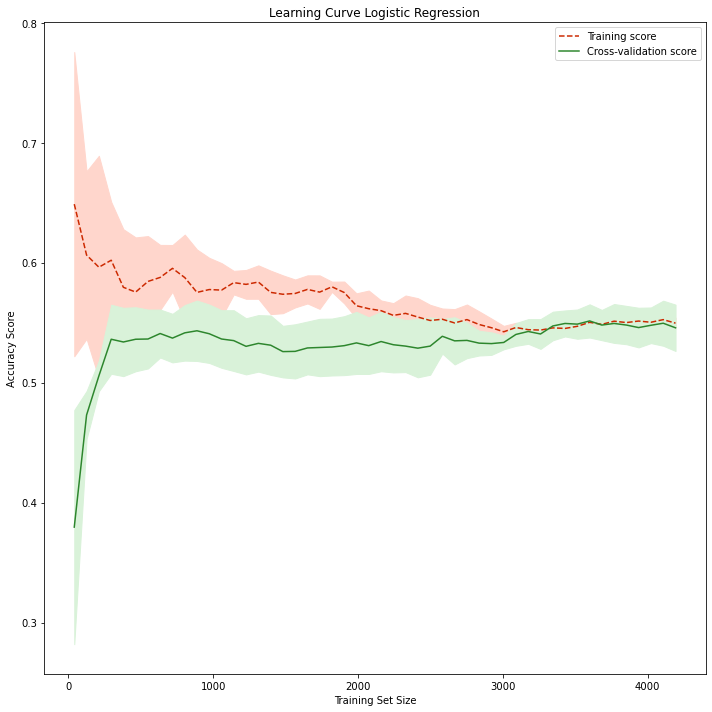

In [15]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=skfold, scoring=
'accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
# calculate the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Ploting the Learning Curve
pyplot.subplots(1, figsize=(10,10))
pyplot.plot(train_sizes, train_mean, '--', color="#cc2900", label="Training score")
pyplot.plot(train_sizes, test_mean, color="#2d862d", label="Cross-validation score")
pyplot.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#ffd6cc")
pyplot.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#d9f2d9")
pyplot.title("Learning Curve Logistic Regression")
pyplot.xlabel("Training Set Size"), pyplot.ylabel("Accuracy Score"), pyplot.legend(loc="best")
pyplot.tight_layout()
pyplot.show()


# KNN Steps with Pipeline

In [16]:
#KNN

model= KNeighborsClassifier()
param_grid = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='accuracy')

print('model.best_score_:',model.best_score_)
print('model.best_params_:',model.best_params_)

# extract best estimator
print('model.best_estimator_',model.best_estimator_)

# to test the bestfit
print('model.score(X_train, y_train) :',model.score(X_train, y_train))
print('model.score(X_test, y_test) :',model.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s


model.best_score_: 0.6280980027934152
model.best_params_: {'algorithm': 'ball_tree', 'n_neighbors': 25, 'weights': 'distance'}
model.best_estimator_ KNeighborsClassifier(algorithm='ball_tree', n_neighbors=25, weights='distance')
model.score(X_train, y_train) : 0.981631679389313
model.score(X_test, y_test) : 0.6177311725452812


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.7s finished


# Random Forest steps with Pipeline

In [17]:
#RandomForest

print('RandomForest')
model = RandomForestClassifier(random_state=42, class_weight="balanced")
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10],
    'max_features': [3, 8],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [2, 5],
    'n_estimators': [30, 50]
}

model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=3, scoring_fit='accuracy')

print('model.best_score_:',model.best_score_)
print('model.best_params_:',model.best_params_)

# extract best estimator
print('model.best_estimator_',model.best_estimator_)

# to test the bestfit
print('model.score(X_train, y_train) :',model.score(X_train, y_train))
print('model.score(X_test, y_test) :',model.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RandomForest
Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    1.3s finished


model.best_score_: 0.6352590143945624
model.best_params_: {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
model.best_estimator_ RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=3,
                       min_samples_leaf=3, n_estimators=50, random_state=42)
model.score(X_train, y_train) : 0.7600190839694656
model.score(X_test, y_test) : 0.6444232602478551


# Decision Tree Steps and evaluation 

In [18]:
# Decision Tree
model= DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
param_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
                                 param_grid, cv=3, scoring_fit='accuracy')

print('model.best_score_:',model.best_score_)
print('model.best_params_:',model.best_params_)

# extract best estimator
print('model.best_estimator_',model.best_estimator_)

# to test the bestfit
print('model.score(X_train, y_train) :',model.score(X_train, y_train))
print('model.score(X_test, y_test) :',model.score(X_test, y_test))



Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


model.best_score_: 0.6202300453762047
model.best_params_: {'max_leaf_nodes': 88, 'min_samples_split': 2}
model.best_estimator_ DecisionTreeClassifier(max_leaf_nodes=88, presort=False, random_state=42)
model.score(X_train, y_train) : 0.7025286259541985
model.score(X_test, y_test) : 0.6329837940896091


[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.0s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


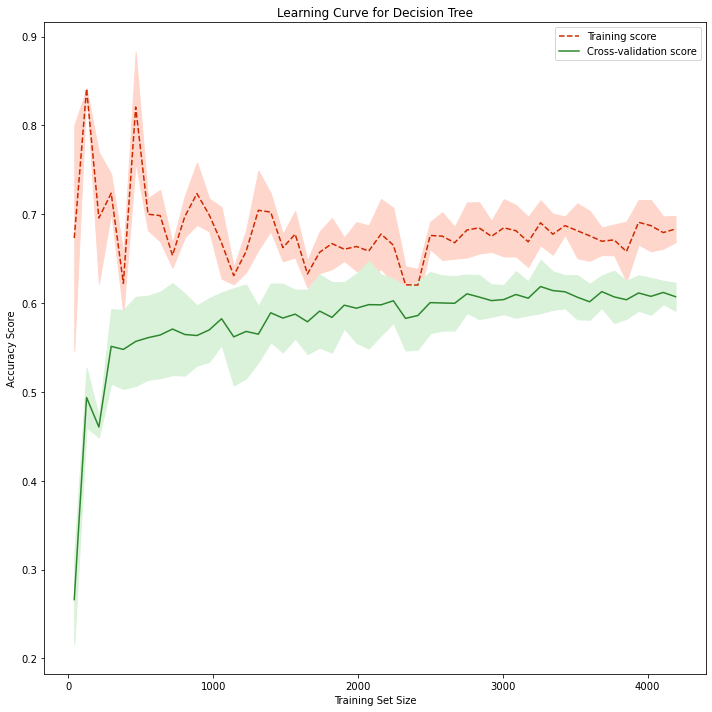

In [19]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=skfold, scoring=
'accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
# calculate the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Ploting the Learning Curve
pyplot.subplots(1, figsize=(10,10))
pyplot.plot(train_sizes, train_mean, '--', color="#cc2900", label="Training score")
pyplot.plot(train_sizes, test_mean, color="#2d862d", label="Cross-validation score")
pyplot.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#ffd6cc")
pyplot.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#d9f2d9")
pyplot.title("Learning Curve for Decision Tree")
pyplot.xlabel("Training Set Size"), pyplot.ylabel("Accuracy Score"), pyplot.legend(loc="best")
pyplot.tight_layout()
pyplot.show()
                 

[[424   7  25  29]
 [ 99  14  19  41]
 [ 13   6  76   5]
 [186   8  34  63]]


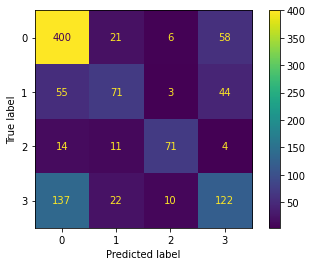

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

print(confusion_matrix(y_test, yhat))
plot_confusion_matrix(model, X_test, y_test)
pyplot.show()


In [21]:
# Classification Report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.59      0.87      0.70       485
           1       0.40      0.08      0.13       173
           2       0.49      0.76      0.60       100
           3       0.46      0.22      0.29       291

    accuracy                           0.55      1049
   macro avg       0.48      0.48      0.43      1049
weighted avg       0.51      0.55      0.49      1049



In [22]:
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=20, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.5s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.9s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.8s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.7s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.7s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.6s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.7s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.7s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.8s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.8s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.9s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.9s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.8s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.6s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.7s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.7s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.6s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.7s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.8s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 294 candidates, totalling 882 fits
MSE: 2.168
Bias: 1.451
Variance: 0.717


[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    1.9s finished
C:\Users\sonia\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "
